# CS 584 :: Data Mining :: George Mason University :: Fall 2022


# Homework 3: Clustering&Association Rule Mining

- **100 points [9% of your final grade]**
- **Due Friday, November 4 by 11:59pm**

- *Goals of this homework:* (1) implement your K-means model; and (2) implement the association rule mining process with the Apriori algorithm.

- *Submission instructions:* for this homework, you only need to submit to Blackboard. Please name your submission **FirstName_Lastname_hw3.ipynb**, so for example, my submission would be something like **Ziwei_Zhu_hw3.ipynb**. Your notebook should be fully executed so that we can see all outputs. 

## Part 1: Clustering (50 points)

In this part, you will implement your own K-means algorithm to conduct clustering on handwritten digit images. In this homework, we will still use the handwritten digit image dataset we have already used in previous homework. However, since clustering is unsupervised learning, which means we do not have the label information. So, here, we will only use the testing data stored in the "test.txt" file.

First, let's load the data by excuting the following code:

In [1]:
import numpy as np

test = np.loadtxt("test.txt", delimiter=',')
test_features = test[:, 1:]
test_labels = test[:, 0]

print('array of testing feature matrix: shape ' + str(np.shape(test_features)))
print('array of testing label matrix: shape ' + str(np.shape(test_labels)))

array of testing feature matrix: shape (10000, 784)
array of testing label matrix: shape (10000,)


Now, it's time for you to implement your own K-means algorithm. First, please write your code to build your K-means model using the image data with **K = 10**, and **Euclidean distance**.

**Note: You should implement the algorithm by yourself. You are NOT allowed to use Machine Learning libraries like Sklearn**

**Note: you need to decide when to stop the model training process.**

In [8]:
# K-means implementation from scratch
print("test feature size:",test_features.size) # checking the size of features
print("test feature shape:",test_features.shape)
print("test features dimesion:",test_features.ndim) # Checking the dimesion of the fetures

# seting the dimesion of features to equal size of feaures and labels
flattened_features = test_features.flatten()
flattened_features
rl = flattened_features.ravel()
rl.shape

#kmean algorithm
import sklearn
import plotly.express as px
import matplotlib.pyplot as plt


class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure

    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for k in range(self.K): # iterations of
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids

    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using eucledian distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        #print("cluster line 27:",clusters)
        return clusters

    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
            #print(centroids[idx])
        return centroids

    # prediction
    def predict_cluster(self, clusters, X):
        global y_pred
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    # plotinng scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0],y_pred , color=y)
        fig.show() # visualize

    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            #print("centroids line 59",centroids)
            diff = centroids - previous_centroids # calculate difference
            #print("centroids difference:",diff)





            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # predict function
        if self.plot_figure: # if true
            self.plot_fig(X, y_pred) # plot function
        from sklearn.metrics import mean_squared_error
        print("Mean Squared Error",mean_squared_error(test_labels, y_pred).sum())
        #mse2 = np.power(test_labels,y_pred,2).mean()
        #mse= (np.mean(X[:,0],y_pred))**2
        #print("mean Squared error manually:",mse)
        return y_pred

if __name__ == "__main__":
        np.random.seed(10)
        num_clusters = 10 # num of cluster
        X = test # using dataset from test.txt
        Kmeans = KMeansClustering(X, num_clusters)
        y_pred = Kmeans.fit(X)

        print("prediction",y_pred.astype(int))


        var_store = {
            'prediction':'y_pred',

            }
        %store var_store



test feature size: 7840000
test feature shape: (10000, 784)
test features dimesion: 2


Mean Squared Error 11.7017
prediction [7 5 2 ... 7 7 9]
Stored 'var_store' (dict)


Next, you need to calculate the Sum of Squared Error (SSE) of each cluster generated by your K-means algorithm. Then, print out the averaged SSE of your algorithm.

In [5]:
# Write your code here
import statsmodels.api as sm

x=y_pred
y= X[:,0]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

import numpy as np
sse = np.sum((model.fittedvalues - y)**2)
print('Sum Of Squared Error: ', sse)

Sum Of Squared Error:  76410.71099510507


Then, please have a look on https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html#sklearn.metrics.homogeneity_completeness_v_measure, and use this function to print out the homogeneity, completeness, and v-measure of your K-means model.

In [6]:
# Write your code here
homogenity,completeness,v_masure = sklearn.metrics.homogeneity_completeness_v_measure(test_labels, y_pred, beta=1.0, )
print("homogenity is:",homogenity)
print("completeness is:",completeness)
print("v_masure is:",v_masure)

homogenity is: 0.4999911479619104
completeness is: 0.5036925379325861
v_masure is: 0.5018350179445569


Ok, now you already have a good model. But can you further improve it? In the next cell, please implement the K-means++ model introduced in the lecture.

Data is: [[7. 5. 2. ... 7. 7. 9.]
 [7. 2. 1. ... 4. 5. 6.]]


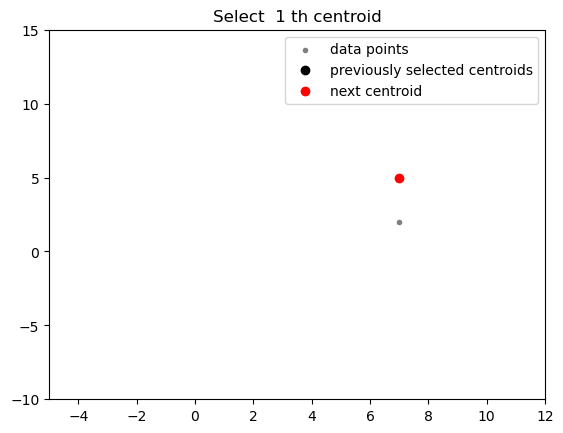

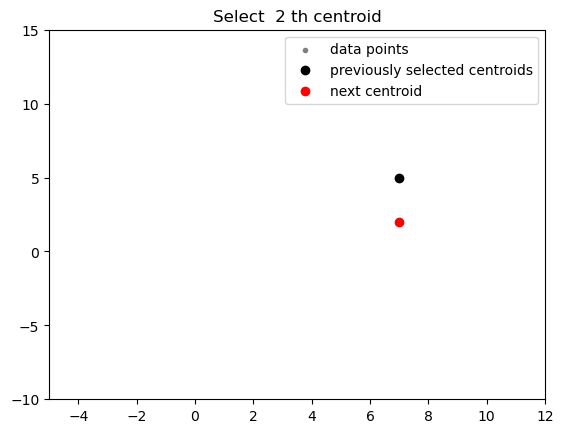

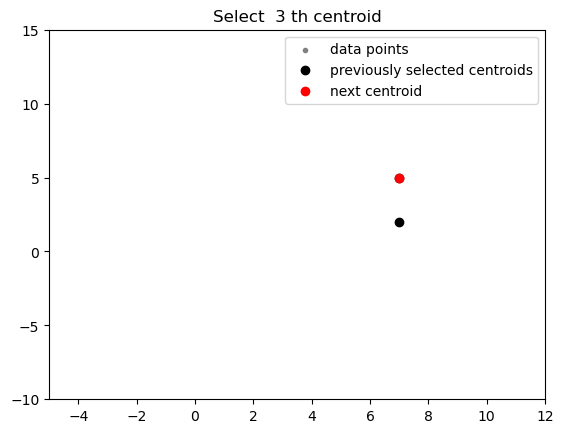

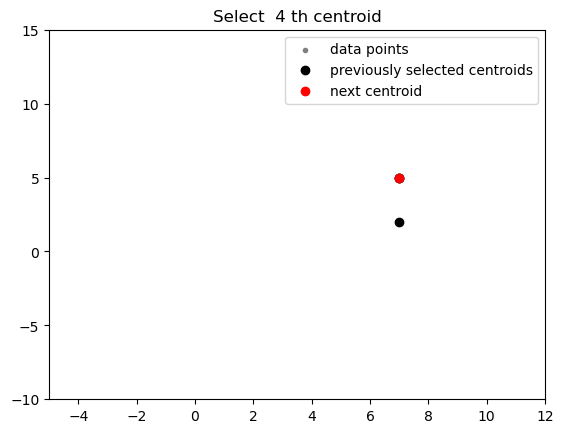

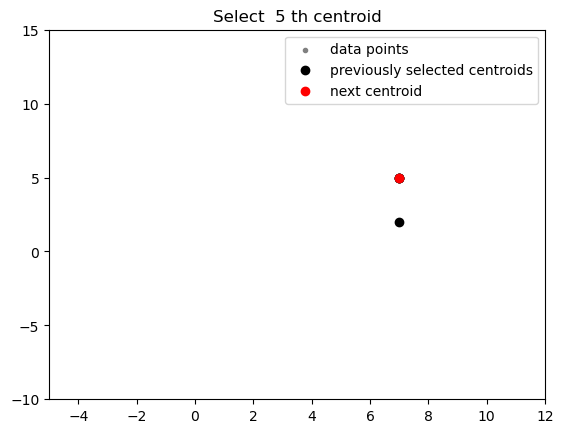

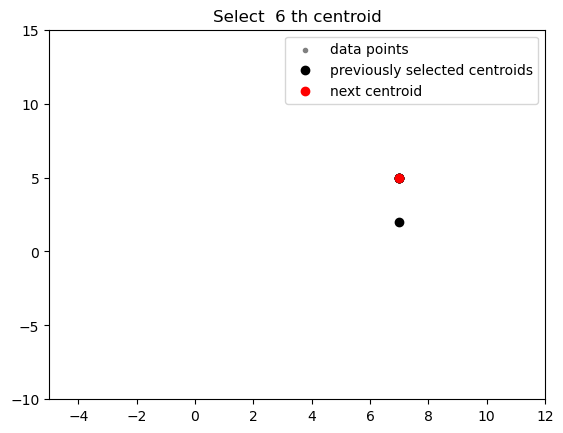

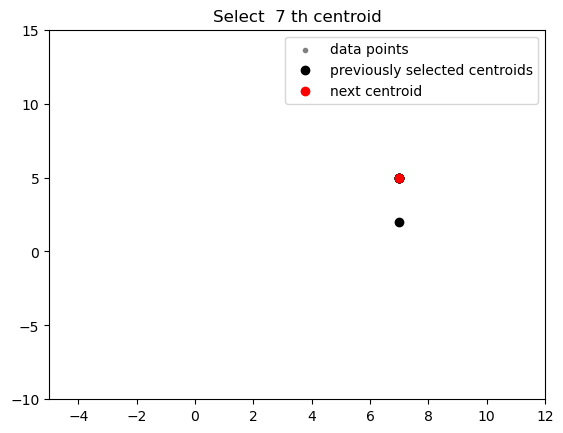

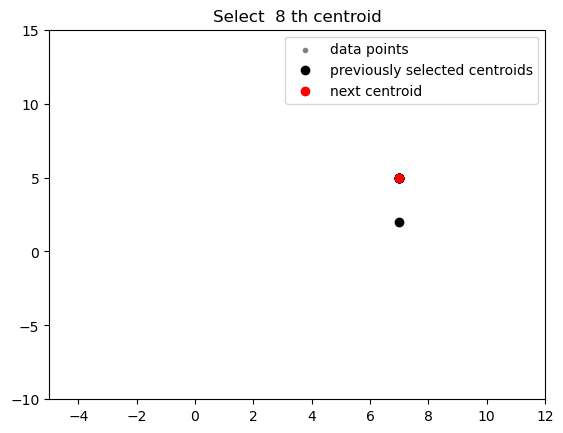

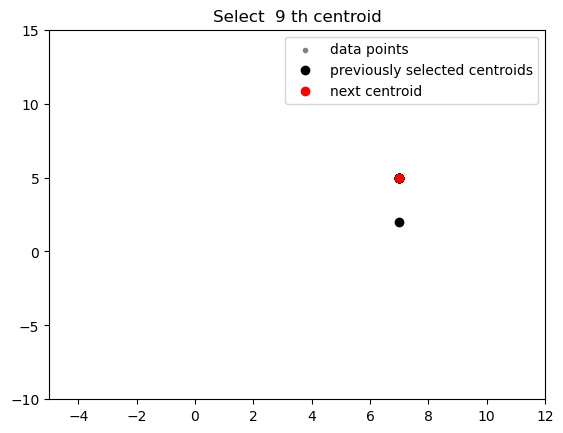

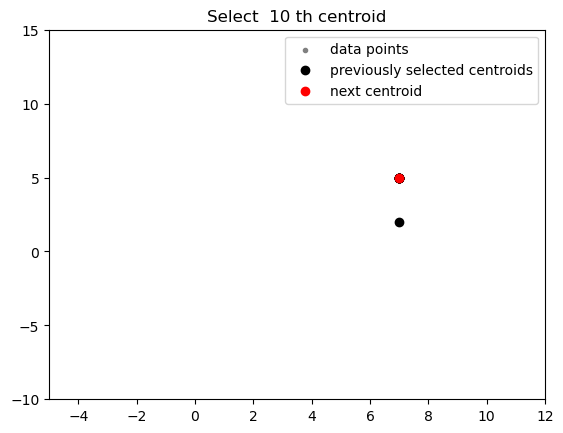

Centroids are: [array([7., 5., 2., ..., 7., 7., 9.]), array([7., 2., 1., ..., 4., 5., 6.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.])]


In [7]:
# Implementing the Kmean++
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# creating data


data = np.vstack((X[:,0],y_pred))
np.random.shuffle(data)
print("Data is:",data)

# function to plot the selected centroids
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
                color = 'black', label = 'previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1],
                color = 'red', label = 'next centroid')
    plt.title('Select % d th centroid'%(centroids.shape[0]))

    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

# function to compute euclidean distance
def distance(p1, p2):
    return np.sum((p1 - p2)**2)

# initialization algorithm
def initialize(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters
    '''
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
    plot(data, np.array(centroids))

    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):

        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize

            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)

        ## select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot(data, np.array(centroids))
    return centroids

# call the initialize function to get the centroids
centroids = initialize(data, k = 10)
print("Centroids are:",centroids)

In the next cell, use sklearn.metrics.homogeneity_completeness_v_measure() to print out the homogeneity, completeness, and v-measure of your K-means++ model.

In [10]:
# Write your code
hehomogenity,completeness,v_masure = sklearn.metrics.homogeneity_completeness_v_measure(test_labels, y_pred, beta=5.0, )
print("homogenity is:",homogenity)
print("completeness is:",completeness)
print("v_masure is:",v_masure)

homogenity is: 0.4999911479619104
completeness is: 0.5036925379325861
v_masure is: 0.5030718385910475


### Question: Comparing the results by K-means and K-means++, do you see significant improvement? Write down in the next cell what do you think are the reasons for observing the improvement or not observing the improve.

#### Kmeans algorithm is staright forward for the clustering of datasets and its calcultes the centroids according to the mean and create cluster and these values to its corresponding cluster. In the above implemented algorithm the Value of K=10 and on the basis of eculedian distance from the clusters elements are grouped together and algorithms homogenity, completeness and v_measureing are performing average. For the Kmean++ improves the drawback of the kmean and and selects the initiale values randomly and then on the bases of best intitialization creates clusters and calculates centroids. and repeat these steps until k reaches the best. and performing good in our case

## Part 2: Association Rule Mining (50 points)

In this part, you are going to examine movies using our understanding of association rules. For this part, you need to implement the apriori algorithm, and apply it to a movie rating dataset to find association rules of user-rate-movie behaviors. First, run the next cell to load the dataset we are going to use.

In [3]:
import numpy as np
user_movie_data = np.loadtxt("movie_rated.txt", delimiter=',')
print('array of user-movie matrix: shape ' + str(np.shape(user_movie_data)))

array of user-movie matrix: shape (11743, 2)


In this dataset, there are two columns: the first column is the integer ids of users, and the second column is the integer ids of movies. Each row denotes that the user of given user id rated the movie of the given movie id. We are going to treat each user as a transaction, so you will need to collect all the movies that have been rated by a single user as a transaction. 

Now, you need to implement the apriori algorithm and apply it to this dataset to find association rules of user rating behaviors with **minimum support of 0.2** and **minimum confidence of 0.8**. We know there are many existing implementations of apriori online (check github for some good starting points). You are welcome to read existing codebases and let that inform your approach. 

**Note: Do not copy-paste any existing code.**

**Note: We want your code to have sufficient comments to explain your steps, to show us that you really know what you are doing.**

**Note: You should add print statements to print out the intermediate steps of your method -- e.g., the size of the candidate set at each step of the method, the size of the filtered set, and any other important information you think will highlight the method.**

In [4]:
init = []
for i in user_movie_data: #appending data 
    for q in i:
        if(q not in init):
            init.append(q)

print(init)

sp = 0.2 #support
s = int(sp*len(init))

from collections import Counter
c = Counter()
for i in init:
    for d in user_movie_data:
        if(i in d):
            c[i]+=1
print("m1:")
for i in c:
    print(str([i])+": "+str(c[i]))
print()
l = Counter()
for i in c:
    if(c[i] >= s):
        l[frozenset([i])]+=c[i]
print("L1:")
for i in l:
    print(str(list(i))+": "+str(l[i]))
print()
pl = l
pos = 1
for count in range (2,1000):
    nc = set()
    temp = list(l)
    for i in range(0,len(temp)):
        for j in range(i+1,len(temp)):
            t = temp[i].union(temp[j])
            if(len(t) == count):
                nc.add(temp[i].union(temp[j]))
    nc = list(nc)
    c = Counter()
    for i in nc:
        c[i] = 0
        for q in user_movie_data:
            temp = set(q)
            if(i.issubset(temp)):
                c[i]+=1
    print("m"+str(count)+":")
    for i in c:
        print(str(list(i))+": "+str(c[i]))
    print()
    l = Counter()
    for i in c:
        if(c[i] >= s):
            l[i]+=c[i]
    print("L"+str(count)+":")
    for i in l:
        print(str(list(i))+": "+str(l[i]))
    print()
    if(len(l) == 0):
        break
    pl = l
    pos = count
print("Result: ")
print("L"+str(pos)+":")
for i in pl:
    print(str(list(i))+": "+str(pl[i]))
print()

from itertools import combinations#Association rule
for l in pl:
    c = [frozenset(q) for q in combinations(l,len(l)-1)]
    mmax = 0
    for a in c:
        b = l-a
        ab = l
        sab = 0
        sa = 0
        sb = 0
        for q in user_movie_data:
            temp = set(q)
            if(a.issubset(temp)):
                sa+=1
            if(b.issubset(temp)):
                sb+=1
            if(ab.issubset(temp)):
                sab+=1
        temp = sab/sa*100
        if(temp > mmax):
            mmax = temp
        temp = sab/sb*100
        if(temp > mmax):
            mmax = temp
        print(str(list(a))+" -> "+str(list(b))+" = "+str(sab/sa*100)+"%")
        print(str(list(b))+" -> "+str(list(a))+" = "+str(sab/sb*100)+"%")
    curr = 1
    print("Movie:", end=' ')
    for a in c:
        b = l-a
        ab = l
        sab = 0
        sa = 0
        sb = 0
        for q in user_movie_data:
            temp = set(q)
            if(a.issubset(temp)):
                sa+=1
            if(b.issubset(temp)):
                sb+=1
            if(ab.issubset(temp)):
                sab+=1
        temp = sab/sa*100
        if(temp == mmax):
            print(curr, end = ' ')
        curr += 1
        temp = sab/sb*100
        if(temp == mmax):
            print(curr, end = ' ')
        curr += 1
    print()
    print()

[1.0, 2160.0, 2312.0, 144.0, 480.0, 2.0, 1221.0, 2890.0, 1228.0, 3.0, 1270.0, 4.0, 1265.0, 1197.0, 830.0, 1625.0, 2501.0, 260.0, 1961.0, 527.0, 474.0, 2020.0, 2028.0, 5.0, 2153.0, 1556.0, 1722.0, 208.0, 1687.0, 1831.0, 1792.0, 198.0, 2826.0, 292.0, 2002.0, 533.0, 95.0, 6.0, 1449.0, 7.0, 2987.0, 1188.0, 728.0, 2067.0, 665.0, 2076.0, 1357.0, 1366.0, 764.0, 766.0, 2171.0, 846.0, 783.0, 858.0, 3067.0, 3211.0, 100.0, 1584.0, 994.0, 1673.0, 1684.0, 1900.0, 159.0, 2710.0, 2575.0, 306.0, 163.0, 175.0, 11.0, 265.0, 1952.0, 41.0, 1203.0, 1204.0, 1217.0, 1224.0, 627.0, 1094.0, 8.0, 1254.0, 906.0, 1942.0, 2940.0, 9.0, 2053.0, 1797.0, 10.0, 2990.0, 1252.0, 1256.0, 587.0, 3007.0, 1344.0, 1293.0, 1513.0, 2245.0, 1387.0, 2352.0, 1480.0, 1488.0, 1635.0, 3255.0, 1653.0, 3189.0, 1663.0, 998.0, 3274.0, 2706.0, 1772.0, 170.0, 249.0, 346.0, 1101.0, 363.0, 1112.0, 377.0, 1127.0, 2795.0, 2883.0, 2893.0, 482.0, 1237.0, 707.0, 2070.0, 2485.0, 2581.0, 12.0, 1268.0, 2097.0, 1297.0, 2474.0, 141.0, 1015.0, 282.0, 1

m2:
[1265.0, 260.0]: 0
[1265.0, 858.0]: 0
[480.0, 1265.0]: 0
[1265.0, 103.0]: 1
[1197.0, 1270.0]: 0
[260.0, 1197.0]: 0
[858.0, 1197.0]: 0
[1197.0, 103.0]: 1
[480.0, 103.0]: 1
[480.0, 858.0]: 0
[480.0, 260.0]: 0
[1265.0, 527.0]: 0
[1265.0, 2028.0]: 0
[480.0, 2028.0]: 0
[260.0, 1270.0]: 1
[858.0, 1270.0]: 0
[1270.0, 103.0]: 1
[1197.0, 527.0]: 0
[1265.0, 1270.0]: 0
[858.0, 260.0]: 1
[260.0, 103.0]: 1
[858.0, 103.0]: 1
[1270.0, 527.0]: 0
[480.0, 1270.0]: 0
[260.0, 2028.0]: 0
[858.0, 2028.0]: 0
[2028.0, 103.0]: 1
[1265.0, 1197.0]: 0
[480.0, 1197.0]: 1
[260.0, 527.0]: 0
[858.0, 527.0]: 0
[103.0, 527.0]: 1
[2028.0, 1197.0]: 0
[2028.0, 1270.0]: 0
[2028.0, 527.0]: 0
[480.0, 527.0]: 0

L2:

Result: 
L1:
[480.0]: 209
[1270.0]: 216
[1265.0]: 203
[1197.0]: 196
[260.0]: 248
[527.0]: 211
[2028.0]: 227
[858.0]: 190
[103.0]: 189

[] -> [480.0] = 1.7797837009282125%
[480.0] -> [] = 100.0%
Movie: 2 

[] -> [1270.0] = 1.8393936813420761%
[1270.0] -> [] = 100.0%
Movie: 2 

[] -> [1265.0] = 1.72868943200204

Finally, print your final association rules in the following format:

**movie_name_1, movie_name_2, ... --> movie_name_k**

where the movie names can be fetched by joining the movieId with the file 'movies.csv'. For example, one rule that you should find is:

**Jurassic Park (1993), Back to the Future (1985) --> Star Wars: Episode IV - A New Hope (1977)**

**Hint: You may need to use the Pandas library to load and process the movies.csv file, such as use pandas.read_csv() to load the data. https://pandas.pydata.org/pandas-docs/dev/user_guide/10min.html is a good place to learn the basics about Pandas.**

In [8]:
import pandas as pd
dt=pd.read_csv('movies.csv')#reading data using pandas

for i in dt:
    print(f'{i}:{dt[i]}')#values
    
data_f = pd.read_table("movie_rated.txt", delimiter=" ")
data_f['movie_rated']  = data_f
data_f.drop(['1,2160'],axis=1,inplace=True)



df_all_cols = pd.concat([dt, data_f], axis = 1) #movieId
df_all_cols.drop(['movie_rated'],axis=1)

df_all_cols2 = pd.concat([dt, data_f], axis = 1)
df_all_cols2["movie_rated"] = df_all_cols2["movie_rated"].replace(",", "", regex=True)
df_all_cols2['movie_rated'] = df_all_cols2['movie_rated'].astype('float64')

means = df_all_cols2.iloc[0:, 2:].median().sort_values(ascending=False)
counts =df_all_cols2.iloc[:, 2:].count()


init_1 = []
for i in df_all_cols2:
    for q in i:
        if(q not in init_1):
            init.append(q)
init = sorted(init_1)
print(init_1)

sp = 0.2
s = int(sp*len(init_1))
s

from itertools import combinations
for l in pl:
    c = [frozenset(q) for q in combinations(l,len(l)-1)]
    nmmax = 0
    for a in c:
        b = l-a
        ab = l
        sab = 0
        sa = 0
        sb = 0
        for q in df_all_cols2:
            temp1 = set(q)
            if(a.issubset(temp1)):
                sa+=1
            if(b.issubset(temp1)):
                sb+=1
            if(ab.issubset(temp1)):
                sab+=1
        temp1 = sab/sa*100
        if(temp1 > nmmax):
            nmmax = temp1
            temp1 = sab/sb*100
        if(temp1 > nmmax):
            nmmax = temp1
            print(str(list(a))+" -> "+str(list(b))+" = "+str(sab/sa*100)+"%")
            print(str(list(b))+" -> "+str(list(a))+" = "+str(sab/sb*100)+"%")
    curr = 1
print(df_all_cols2['movie_name'][0], end=' ')
for a in c:
        b = l-a
        ab = l
        sab = 0
        sa = 0
        sb = 0
        for q in df_all_cols2:
            temp1 = set(q)
            if(a.issubset(temp1)):
                sa+=1
            if(b.issubset(temp1)):
                sb+=1
            if(ab.issubset(temp1)):
                sab+=1
                temp1 = sab/sa*100
            if(temp1 == nmmax):
                print(curr, end = ' ')
                curr += 1
                temp1 = sab/sb*100
                if(temp1 == nmmax):
                    print(curr, end = ' ')
                curr += 1
                print()
                print()
from itertools import combinations
for l in pl:
    c = [frozenset(q) for q in combinations(l,len(l)-1)]
    nmmax = 0
    for a in c:
        b = l-a
        ab = l
        sab = 0
        sa = 0
        sb = 0
        for q in df_all_cols2:
            temp1 = set(q)
            if(a.issubset(temp1)):
                sa+=1
            if(b.issubset(temp1)):
                sb+=1
            if(ab.issubset(temp1)):
                sab+=1
            temp1 = sab/sa*100
            if(temp1 > nmmax):
                nmmax = temp1
                temp1 = sab/sb*100
            if(temp1 > nmmax):
                nmmax = temp1
                print(str(list(a))+" -> "+str(list(b))+" = "+str(sab/sa*100)+"%")
                print(str(list(b))+" -> "+str(list(a))+" = "+str(sab/sb*100)+"%")
    curr = 1
print(df_all_cols2['movie_name'][1],"==>",df_all_cols2['movie_name'][3])


movieId:0          1
1          2
2          3
3          4
4          5
        ... 
3878    3948
3879    3949
3880    3950
3881    3951
3882    3952
Name: movieId, Length: 3883, dtype: int64
movie_name:0                         Toy Story (1995)
1                           Jumanji (1995)
2                  Grumpier Old Men (1995)
3                 Waiting to Exhale (1995)
4       Father of the Bride Part II (1995)
                       ...                
3878               Meet the Parents (2000)
3879            Requiem for a Dream (2000)
3880                      Tigerland (2000)
3881               Two Family House (2000)
3882                 Contender, The (2000)
Name: movie_name, Length: 3883, dtype: object
[]
Toy Story (1995) Jumanji (1995) ==> Waiting to Exhale (1995)
